# Starters
## Import Packages

In [110]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [111]:
import scipy.stats as st
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [112]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [113]:
# import needed packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
## --------------------------------------------- ##

In [114]:
def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show() 

In [115]:
sns.set_style('darkgrid')

## Import Data

In [116]:
explored_dataset = pd.read_csv('/Users/souha_kassab/OC_project3/static/csv/explored_dataset_20230211.csv', 
                               index_col=[0])

In [117]:
explored_dataset.head()

,Buildingtype,Primarypropertytype,Propertyname,Address,Zipcode,Councildistrictcode,Neighborhood,Latitude,Longitude,Yearbuilt,...,Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions
0,nonresidential,hotel,mayflower_park_hotel,405_olive_way,98101.0,7,downtown,47.61220,-122.33799,1927,...,7226362.5,2003882.00,3946027.0,1276453.0,1,1,1,0,0,249.98
1,nonresidential,hotel,paramount_hotel,724_pine_street,98101.0,7,downtown,47.61317,-122.33393,1996,...,8387933.0,0.00,3242851.0,5145082.0,1,1,1,0,0,295.86
2,nonresidential,hotel,5673-the_westin_seattle,1900_5th_avenue,98101.0,7,downtown,47.61393,-122.33810,1969,...,72587024.0,21566554.00,49526664.0,1493800.0,1,1,1,0,0,2089.28
3,nonresidential,hotel,hotel_max,620_stewart_st,98101.0,7,downtown,47.61412,-122.33664,1926,...,6794584.0,2214446.25,2768924.0,1811213.0,1,1,1,0,0,286.43
4,nonresidential,hotel,warwick_seattle_hotel_(id8),401_lenora_st,98121.0,7,downtown,47.61375,-122.34047,1980,...,14172606.0,0.00,5368607.0,8803998.0,1,1,1,0,0,505.01


In [118]:
explored_dataset.shape

(3347, 32)

In [119]:
explored_dataset.isna().sum()

Buildingtype                         0
Primarypropertytype                  0
Propertyname                         0
Address                              0
Zipcode                             16
Councildistrictcode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
Yearbuilt                            0
Numberofbuildings                    0
Numberoffloors                       0
Propertygfatotal                     0
Propertygfaparking                   0
Listofallpropertyusetypes            0
Largestpropertyusetype               0
Largestpropertyusetypegfa            0
Secondlargestpropertyusetype         0
Secondlargestpropertyusetypegfa      0
Energystarscore                    824
Siteeui(Kbtu/Sf)                     0
Siteeuiwn(Kbtu/Sf)                   0
Siteenergyuse(Kbtu)                  0
Steamuse(Kbtu)                       0
Electricity(Kbtu)                    0
Naturalgas(Kbtu)         

# Regression using statsmodels
## Modelling emissions

In [120]:
H = explored_dataset.drop(columns =["Siteenergyuse(Kbtu)"], axis=1).join(explored_dataset['Siteenergyuse(Kbtu)'])

H = H.select_dtypes(include=['float64','int64']).dropna()
H = H[H['Siteenergyuse(Kbtu)']>0]
H.head()

,Zipcode,Councildistrictcode,Latitude,Longitude,Yearbuilt,Numberofbuildings,Numberoffloors,Propertygfatotal,Propertygfaparking,Largestpropertyusetypegfa,...,Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions,Siteenergyuse(Kbtu)
0,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434.0,...,2003882.00,3946027.0,1276453.0,1,1,1,0,0,249.98,7226362.5
1,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,15064,83880.0,...,0.00,3242851.0,5145082.0,1,1,1,0,0,295.86,8387933.0
2,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,196718,756493.0,...,21566554.00,49526664.0,1493800.0,1,1,1,0,0,2089.28,72587024.0
3,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320.0,...,2214446.25,2768924.0,1811213.0,1,1,1,0,0,286.43,6794584.0
4,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,62000,123445.0,...,0.00,5368607.0,8803998.0,1,1,1,0,0,505.01,14172606.0


In [121]:
H.shape

(2520, 24)

In [122]:
class Regression:
    def __init__(self, df, apply_log):
        self.H = df
        ## Separate input features and target feature
        b = self.H.iloc[:, -1] # Target
        A = self.H.iloc[:, :-1] #all other features    
        if apply_log is True:
            b = np.log(abs(b))
        ## Re-scale the features
        scaler = MinMaxScaler(feature_range=(0,1))
        rescaledX = scaler.fit_transform(A)
        # Convert X back to a Pandas DataFrame, for convenience
        A = pd.DataFrame(rescaledX, index=A.index, columns=A.columns)
        # Permute
        p = np.random.permutation(len(self.H))
        A = A.iloc[p, :]
        b = b.iloc[p]
        # Separate data into test and train sets
        n = int(len(self.H)*4/5)
        self.btrain = b.iloc[:n]
        self.Atrain = A.iloc[:n]
        self.btest = b.iloc[n:]
        self.Atest = A.iloc[n:]
        self.Atrain=sm.add_constant(self.Atrain)        #to add constant value in the model
        # Fit multiple linear regression model
        self.OLS_model= sm.OLS(self.btrain, self.Atrain).fit() 
        print(self.OLS_model.summary())
        # Predict
        train_predictions = self.OLS_model.predict(self.Atrain)
        print("    MAE", mean_absolute_error(self.btrain,train_predictions))
        print("    RMSE", np.sqrt(mean_squared_error(self.btrain, train_predictions)))
        print("    R2", r2_score(self.btrain, train_predictions))
        # Test: Evaluate the models against test data using MAE, RMSE and R2
        self.Atest=sm.add_constant(self.Atest)        #to add constant value in the model
        test_predictions = self.OLS_model.predict(self.Atest)
        print("    MAE", mean_absolute_error(self.btest,test_predictions))
        print("    RMSE", np.sqrt(mean_squared_error(self.btest, test_predictions)))
        print("    R2", r2_score(self.btest, test_predictions))
       
        # Residual error plots
        residual_values = self.OLS_model.resid
        fig = plt.figure(figsize=(12,8))
        self.sorted_residual_values = residual_values.sort_index()
        self.sorted_residual_values.hist(bins = 30)
        plt.title('Residual values of OLS_model')
        plt.show()
        fig = plt.figure(figsize=(12,8))
        #fig = sm.graphics.plot_regress_exog(OLS_model, Atrain, fig=fig)
        ((self.btrain-train_predictions)).hist(bins=30)
        plt.title('Distribution of test residuals')
        plt.show()

## --------------------------------------------- ##


/Users/souha_kassab/opt/miniconda3/envs/OC_Project2/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                             OLS Regression Results                            
Dep. Variable:     Siteenergyuse(Kbtu)   R-squared:                       0.747
Model:                             OLS   Adj. R-squared:                  0.744
Method:                  Least Squares   F-statistic:                     280.3
Date:                 Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                         16:00:09   Log-Likelihood:                -1708.7
No. Observations:                 2016   AIC:                             3461.
Df Residuals:                     1994   BIC:                             3585.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


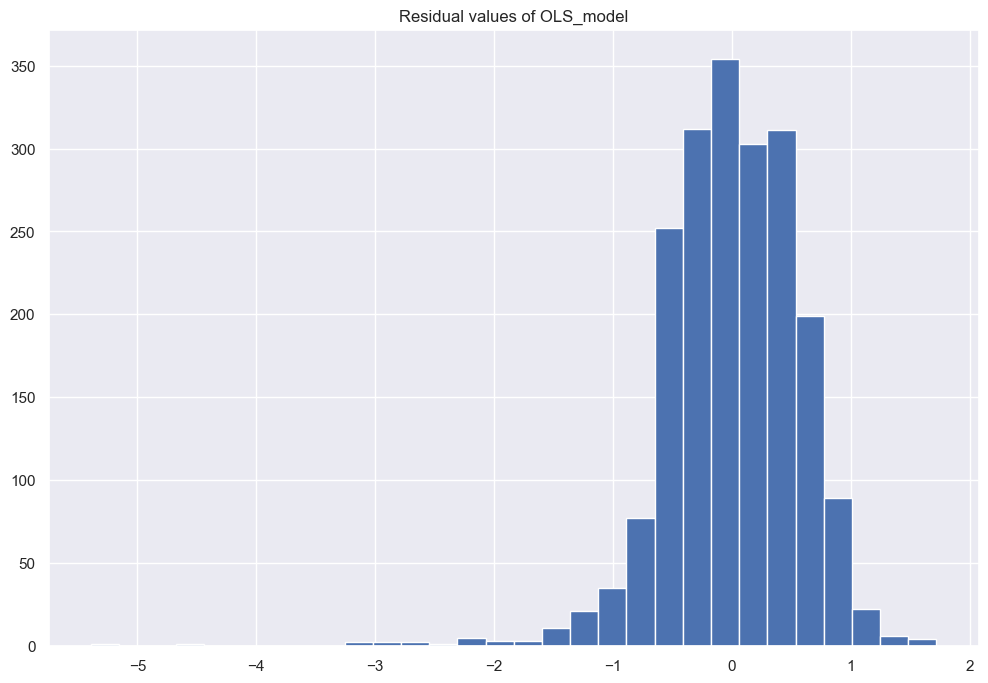

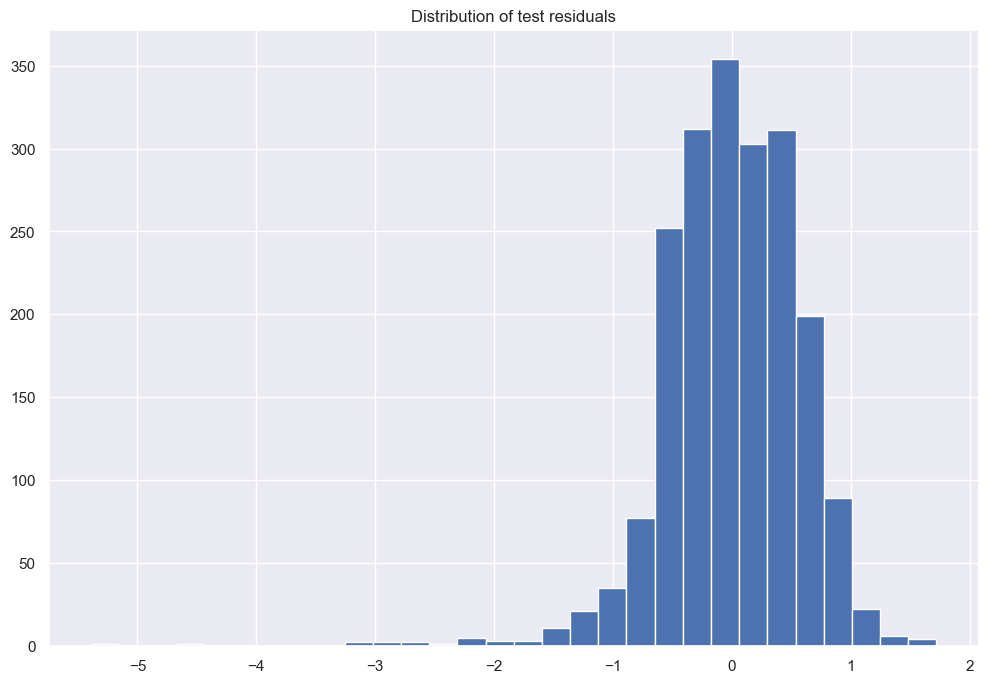

In [123]:
regression = Regression(df=H, apply_log=True)

Error metrics of test and train sets are quite similar: no overfitting problem
Many outliers on residual distribution==>potentially some missing features?


In [124]:
regression.OLS_model.resid?

## Explore initial set of features

In [125]:
resid_H_index=regression.Atrain.loc[regression.sorted_residual_values>2].index
explored_dataset.loc[resid_H_index]

,Buildingtype,Primarypropertytype,Propertyname,Address,Zipcode,Councildistrictcode,Neighborhood,Latitude,Longitude,Yearbuilt,...,Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions


## Cross-validation

In [127]:
X = regression.Atrain
y = regression.btrain
X.head()

,const,Zipcode,Councildistrictcode,Latitude,Longitude,Yearbuilt,Numberofbuildings,Numberoffloors,Propertygfatotal,Propertygfaparking,...,Siteeuiwn(Kbtu/Sf),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions
973,1.0,0.353846,1.000000,0.452706,0.402775,0.000000,0.0625,0.050505,0.012222,0.0,...,0.071668,0.0,0.005189,0.002531,1.0,1.0,1.0,0.0,0.0,0.002962
1119,1.0,0.638462,0.166667,0.047934,0.783717,0.469565,0.0625,0.020202,0.005980,0.0,...,0.056088,0.0,0.002228,0.004090,1.0,1.0,1.0,0.0,0.0,0.004088
855,1.0,0.507692,0.333333,0.379207,0.576043,0.617391,0.0625,0.040404,0.021791,0.0,...,0.051294,0.0,0.008608,0.000000,0.0,1.0,1.0,0.0,0.0,0.000976
2162,1.0,0.438462,0.000000,0.099574,0.248236,0.782609,0.0625,0.010101,0.012379,0.0,...,0.110618,0.0,0.012882,0.000684,1.0,1.0,1.0,0.0,0.0,0.002103
1033,1.0,0.373077,1.000000,0.590499,0.301059,0.539130,0.0625,0.010101,0.004576,0.0,...,0.420062,0.0,0.017772,0.013516,1.0,1.0,1.0,0.0,0.0,0.014691


In [128]:
# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score
#from sklearn.metrics import c
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Create 10 folds
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Create a model 
model = LinearRegression()

# Train and evaluate multiple models using kfolds
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print("Mean:", results.mean())

[0.77147034 0.59904097 0.7684462  0.74799272 0.61980529 0.69550588
 0.50215259 0.73271171 0.7621345  0.72447378]
Mean: 0.6923733962431553


In [129]:
# Evaluate multiple models and test sets using kfolds
print(cross_val_score(model, regression.Atest, regression.btest, cv=kfold, scoring='r2'))

[0.63832354 0.75050043 0.717668   0.79004033 0.52751203 0.4686998
 0.76462361 0.78144785 0.76535455 0.18978348]


## Features Selection

### spotting multicolinearity

In [130]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns
correlatedFeatures(H.iloc[:,:-1], 0.85)

{'Largestpropertyusetypegfa',
 'Siteeuiwn(Kbtu/Sf)',
 'compliant',
 'error_-_correct_default_data'}

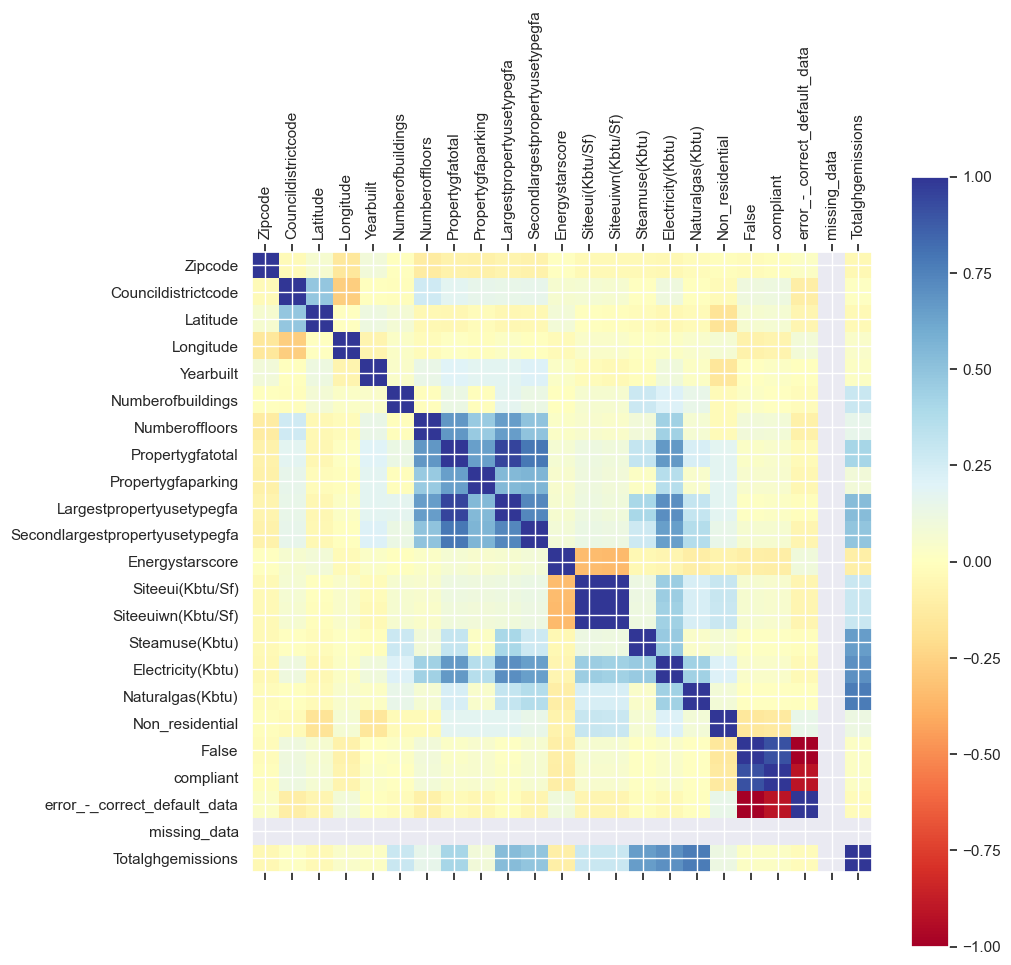

In [131]:
# To visualize with whom those features are correlated
correlationMatrix(H.iloc[:,:-1])

In [132]:
H_no_multicolinearities = H.drop(columns = ['Largestpropertyusetypegfa','Siteeuiwn(Kbtu/Sf)',
                                            'compliant','error_-_correct_default_data',
                                            'missing_data'], axis=1)
H_no_multicolinearities.head()

,Zipcode,Councildistrictcode,Latitude,Longitude,Yearbuilt,Numberofbuildings,Numberoffloors,Propertygfatotal,Propertygfaparking,Secondlargestpropertyusetypegfa,Energystarscore,Siteeui(Kbtu/Sf),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,Totalghgemissions,Siteenergyuse(Kbtu)
0,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,0,0.0,60.0,81.699997,2003882.00,3946027.0,1276453.0,1,1,249.98,7226362.5
1,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,15064,15064.0,61.0,94.800003,0.00,3242851.0,5145082.0,1,1,295.86,8387933.0
2,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,196718,0.0,43.0,96.000000,21566554.00,49526664.0,1493800.0,1,1,2089.28,72587024.0
3,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,0,0.0,56.0,110.800003,2214446.25,2768924.0,1811213.0,1,1,286.43,6794584.0
4,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,62000,68009.0,75.0,114.800003,0.00,5368607.0,8803998.0,1,1,505.01,14172606.0


In [133]:
Hbis_no_multicolinearities = H_no_multicolinearities.drop('Totalghgemissions', axis=1)

                             OLS Regression Results                            
Dep. Variable:     Siteenergyuse(Kbtu)   R-squared:                       0.724
Model:                             OLS   Adj. R-squared:                  0.722
Method:                  Least Squares   F-statistic:                     308.3
Date:                 Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                         16:01:09   Log-Likelihood:                -1778.2
No. Observations:                 2016   AIC:                             3592.
Df Residuals:                     1998   BIC:                             3693.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


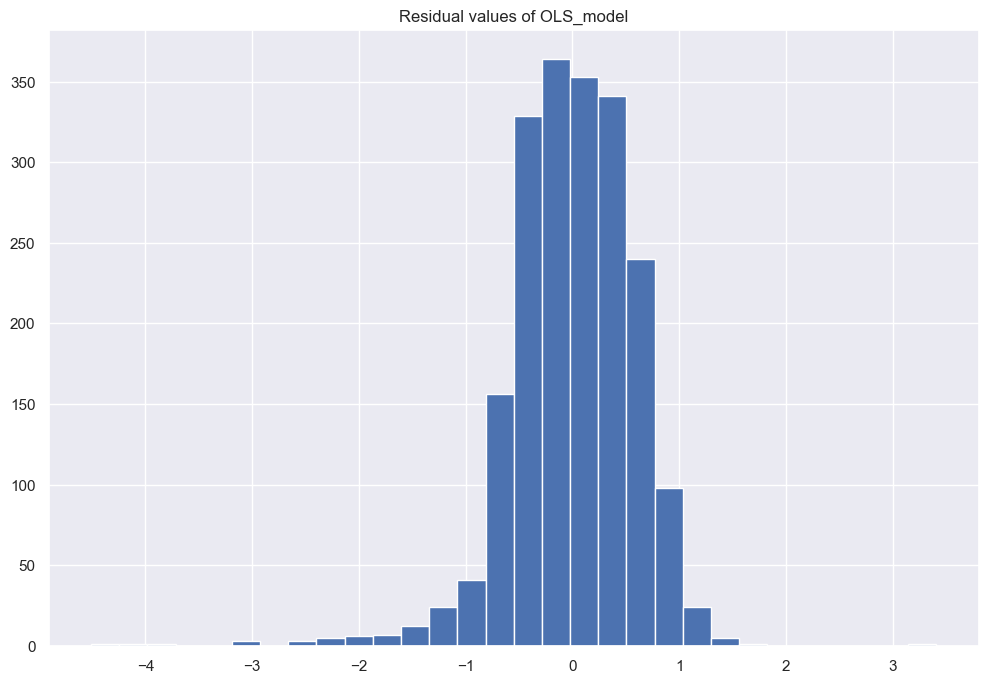

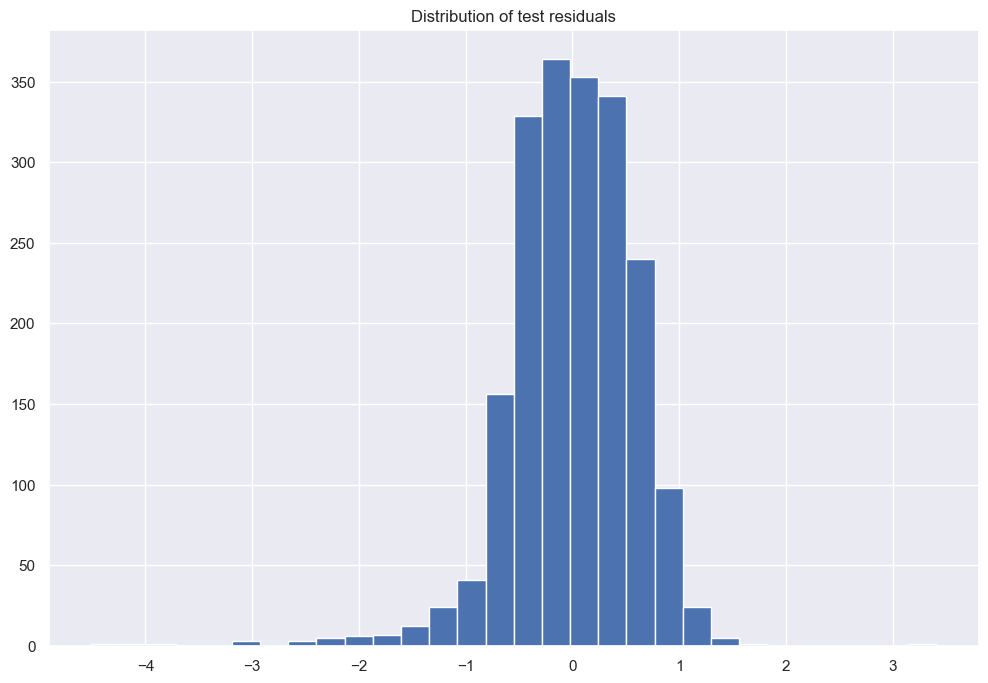

In [134]:
regression = Regression(df=Hbis_no_multicolinearities, apply_log=True)

In [135]:
resid_H_index=regression.Atrain.loc[regression.sorted_residual_values>3].index
explored_dataset.loc[resid_H_index]

,Buildingtype,Primarypropertytype,Propertyname,Address,Zipcode,Councildistrictcode,Neighborhood,Latitude,Longitude,Yearbuilt,...,Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions
3264,nonresidential,hospital,virginia_mason_medical_center_-_2149,925_seneca_st.,98101.0,3,east,47.60986,-122.32774,1920,...,163945984.0,73885472.0,90060497.0,0.0,1,1,1,0,0,6330.91


### Variance threshold

In [136]:
# Perform feature selection using a variance threshold of 0.01 (look for features explaining very little of the total variance)
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.01))
sel.fit(regression.Atrain)

print("Feature selection", sel.get_support())
print("Selected features:", list((regression.Atrain).columns[sel.get_support()]))
print("Removed features:", list((regression.Atrain).columns[~sel.get_support()]))

Feature selection [False False  True  True  True  True False False False False False  True
 False False False False  True  True]
Selected features: ['Councildistrictcode', 'Latitude', 'Longitude', 'Yearbuilt', 'Energystarscore', 'Non_residential', 'False']
Removed features: ['const', 'Zipcode', 'Numberofbuildings', 'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking', 'Secondlargestpropertyusetypegfa', 'Siteeui(Kbtu/Sf)', 'Steamuse(Kbtu)', 'Electricity(Kbtu)', 'Naturalgas(Kbtu)']


In [137]:
#H_high_variance = H.drop(columns=[ 'Zipcode', 'Numberofbuildings', 'Numberoffloors', 'Propertygfatotal', 
 #                                 'Propertygfaparking', 'Secondlargestpropertyusetypegfa', 'Siteeui(Kbtu/Sf)',
  #                                'Steamuse(Kbtu)', 'Electricity(Kbtu)', 'Naturalgas(Kbtu)'])
H_high_variance = H_no_multicolinearities.drop(columns=['Zipcode', 'Numberofbuildings',
                                                        'Numberoffloors', 'Propertygfatotal',
                                                        'Propertygfaparking', 'Secondlargestpropertyusetypegfa',
                                                        'Siteeui(Kbtu/Sf)', 'Steamuse(Kbtu)',
                                                        'Electricity(Kbtu)', 'Naturalgas(Kbtu)',
                                                        'Totalghgemissions'], axis=1)
H_high_variance.isnull().sum()

Councildistrictcode    0
Latitude               0
Longitude              0
Yearbuilt              0
Energystarscore        0
Non_residential        0
False                  0
Siteenergyuse(Kbtu)    0
dtype: int64

                             OLS Regression Results                            
Dep. Variable:     Siteenergyuse(Kbtu)   R-squared:                       0.250
Model:                             OLS   Adj. R-squared:                  0.247
Method:                  Least Squares   F-statistic:                     95.53
Date:                 Sat, 18 Feb 2023   Prob (F-statistic):          1.41e-120
Time:                         16:01:10   Log-Likelihood:                -2793.5
No. Observations:                 2016   AIC:                             5603.
Df Residuals:                     2008   BIC:                             5648.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  1

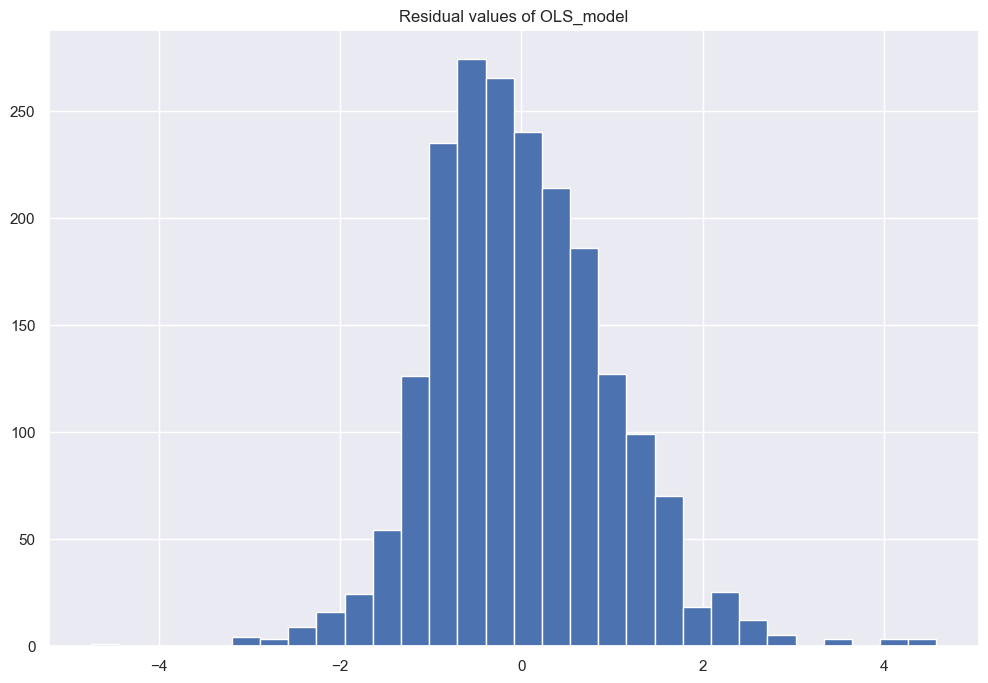

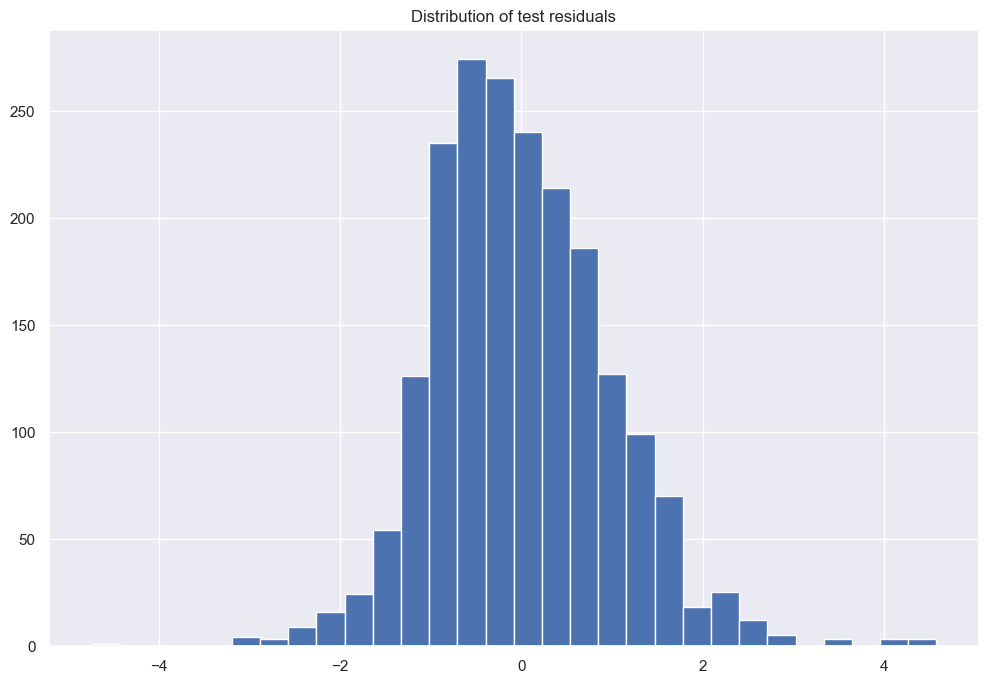

In [138]:
regression = Regression(df=H_high_variance, apply_log=True)

model_rfe.score

In [140]:
# Lasso
from sklearn.linear_model import LassoCV
# Split into X and y
X = Hbis_no_multicolinearities.iloc[:, :-1].values
y = Hbis_no_multicolinearities.iloc[:, -1].values
#X = X.loc[:, 'MS SubClass':'MS Zoning_RM']
X_dataset = X

# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

# Train test split
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Create model
model_l = LassoCV()

# Fit model
model_l.fit(X_train, y_train)
predictions = model_l.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_l.predict(X_test)
print("Test:", r2_score(y_test, predictions))

Train: 0.9995634084238334
Test: 0.9960693451686566


## Ridge regularization

                             OLS Regression Results                            
Dep. Variable:     Siteenergyuse(Kbtu)   R-squared:                       0.722
Model:                             OLS   Adj. R-squared:                  0.720
Method:                  Least Squares   F-statistic:                     306.0
Date:                 Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                         16:02:07   Log-Likelihood:                -1815.4
No. Observations:                 2016   AIC:                             3667.
Df Residuals:                     1998   BIC:                             3768.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


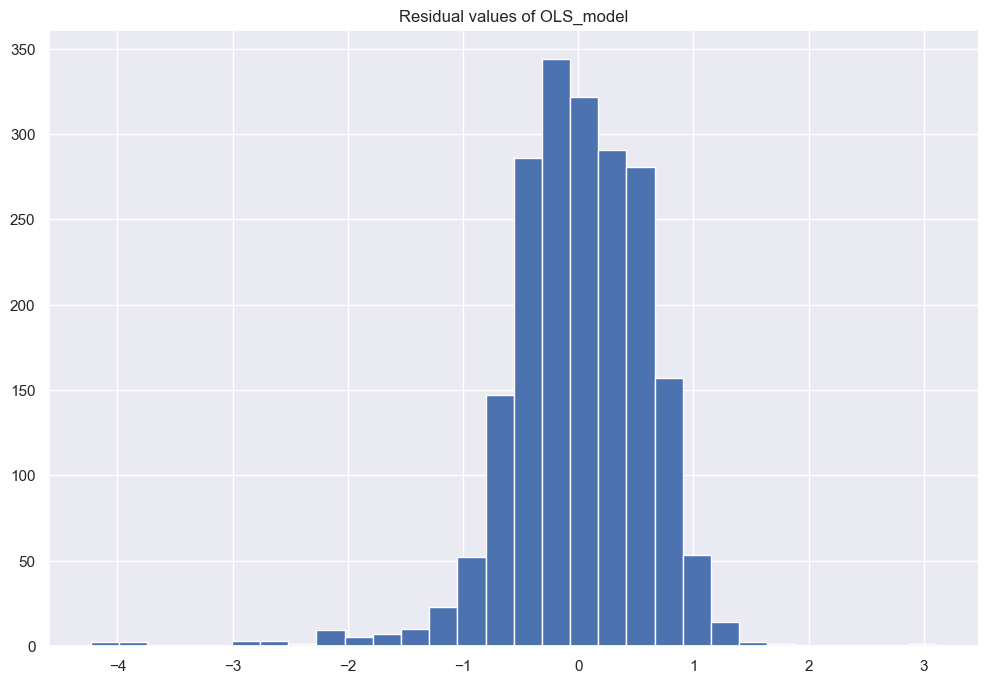

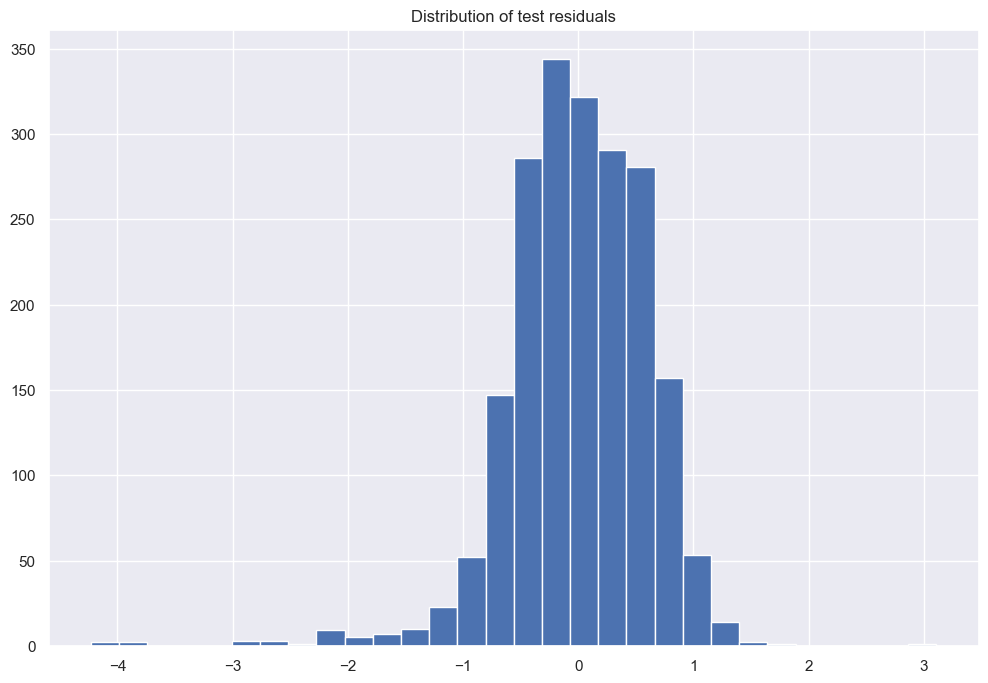

In [141]:
ridge_regression=Regression(df=Hbis_no_multicolinearities, apply_log=True)

In [142]:
## Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# Create model
model_ridge = Ridge(alpha=1) # alpha c'est moi qui le choisis!!

#Fit model
model_ridge.fit(ridge_regression.Atrain, ridge_regression.btrain)
predictions = model_ridge.predict(ridge_regression.Atrain)
print("Train: \n R2", r2_score(ridge_regression.btrain, predictions),
      "RMSE:", np.sqrt(mean_squared_error(ridge_regression.btrain, predictions)),
      "MAE:", mean_absolute_error(ridge_regression.btrain, predictions))
    
# Evaluate
predictions = model_ridge.predict(ridge_regression.Atest)
print("Test: \n R2:", r2_score(ridge_regression.btest, predictions),
      "RMSE:", np.sqrt(mean_squared_error(ridge_regression.btest, predictions)),
      "MAE:", mean_absolute_error(ridge_regression.btest, predictions))
print("Alpha:", model_ridge.alpha)

Train: 
 R2 0.7075721061806216 RMSE: 0.6112539297235776 MAE: 0.4765893488937795
Test: 
 R2: 0.6947347378495018 RMSE: 0.5642822952720586 MAE: 0.44629780864751
Alpha: 1


## Cross-validation with ridge

In [143]:
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create model
model_rcv = Ridge()

# Train and evaluate multiple models using kfolds
results = cross_val_score(model_rcv, ridge_regression.Atrain,ridge_regression.btrain, 
                          cv=kfold, scoring='r2')
print()
print(results)
print("Mean:", results.mean())


[0.65554904 0.72192081 0.6836058  0.7023965  0.69613228]
Mean: 0.6919208879650167


In [144]:
## Gridsearch for hyperparameters tuning
# Sklearn regression algorithms
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
# Create 5 folds
seed = 13
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Create model
model_rcv = RidgeCV(cv=kfold)

#Fit model
model_rcv.fit(ridge_regression.Atrain, ridge_regression.btrain)
predictions = model_rcv.predict(ridge_regression.Atrain)
print("Train:", r2_score(ridge_regression.btrain, predictions))

# Evaluate
predictions = model_rcv.predict(ridge_regression.Atest)
print("Test:", r2_score(ridge_regression.btest, predictions))

print("Alpha:", model_rcv.alpha_)

Train: 0.7075721061806216
Test: 0.6947347378495018
Alpha: 1.0


In [145]:
# Create a function to plot the magnitude of coefficients on a log scale
def plotCoef(model, info=""):
    # Plot the coeffients as bars
    fig = plt.figure(figsize=(15,4))
    fig.suptitle(type(model).__name__ + " " + info, fontsize=16)
    rects = plt.bar(np.arange(len(model.coef_)), model.coef_, color="lightblue")

    plt.gca().set_xticklabels([])
    plt.xticks([])
    plt.yscale('symlog')
    plt.show()


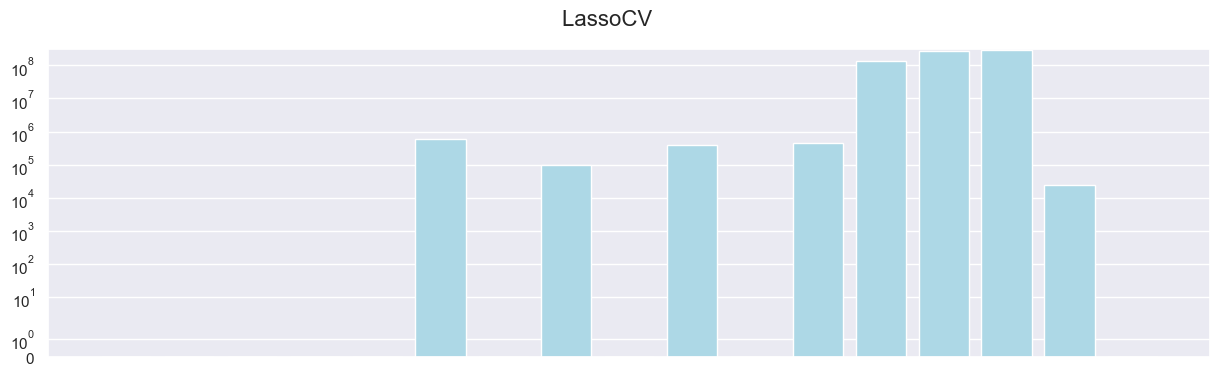

In [146]:
plotCoef(model_l)

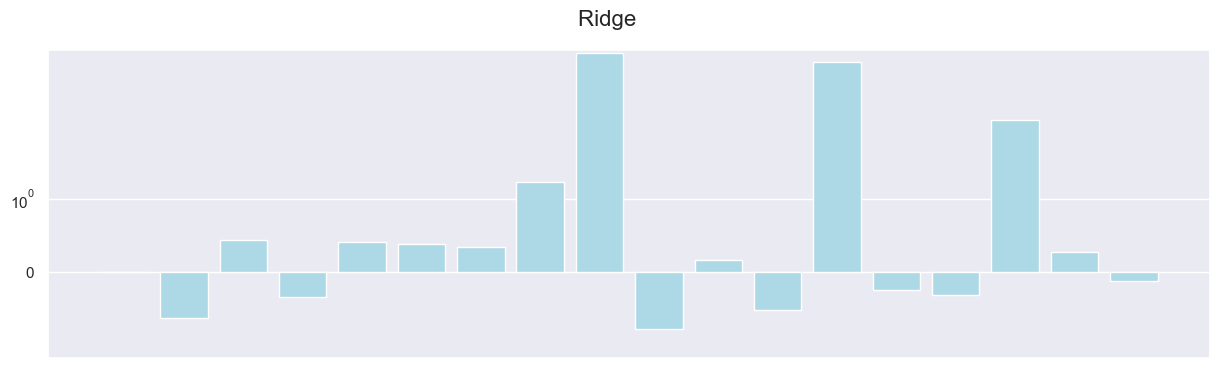

In [147]:
# Visualise linear regression coefficients
plotCoef(model_ridge)

# Gradient boost and XGboost

In [148]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(
n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error' ).fit(regression.Atrain, regression.btrain)
mean_squared_error(regression.btest, est.predict(regression.Atest))
r2_score(regression.btest, est.predict(regression.Atest))

0.2947730290404953

In [149]:
import xgboost as xgb
X, y = Hbis_no_multicolinearities.iloc[:,:-1], Hbis_no_multicolinearities.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


In [150]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
r_2 = r2_score(y_test, preds)
print("RMSE: %f" % (rmse),
     'R2: %f' %(r_2))


RMSE: 4975419.613900 R2: 0.499823
